In [16]:
import os
# import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout, Conv2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [2]:
import tensorflow as tf

In [3]:
train = ImageDataGenerator(validation_split=0.2)

train_path = 'cell_images/'

In [4]:
training_data = train.flow_from_directory(train_path,
                                          target_size=(150, 150),
                                          class_mode='binary',
                                          color_mode="grayscale",
                                          subset="training")

Found 22048 images belonging to 2 classes.


In [5]:
validation_data = train.flow_from_directory(train_path,
                                          target_size=(150, 150),
                                          class_mode='binary',  
                                          color_mode="grayscale",
                                          subset="validation")

Found 5510 images belonging to 2 classes.


In [6]:
training_data.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [7]:
model = Sequential()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-01-07 12:48:53.664289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-07 12:48:53.664467: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [9]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [10]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
model_checkpoint = ModelCheckpoint('model_weights/malariaDetector_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)


In [12]:
history = model.fit_generator(
        generator=training_data,
        epochs=10,
        steps_per_epoch=len(training_data),
        validation_steps=len(validation_data),
        validation_data=validation_data,
        callbacks = [early_stopping,model_checkpoint]
        )

/var/folders/4m/_7y4kbtd0l5gjj3fhdysn97c0000gn/T/ipykernel_1581/2236176722.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2022-01-07 12:49:05.053445: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-01-07 12:49:05.328686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


689/689 [==============================] - ETA: 0s - loss: 0.4650 - accuracy: 0.8080

2022-01-07 12:50:32.590579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_loss improved from inf to 0.36178, saving model to model_weights/malariaDetector_01-0.843376.h5
689/689 [==============================] - 93s 134ms/step - loss: 0.4650 - accuracy: 0.8080 - val_loss: 0.3618 - val_accuracy: 0.8434
Epoch 2/10
689/689 [==============================] - ETA: 0s - loss: 0.1664 - accuracy: 0.9471
Epoch 00002: val_loss improved from 0.36178 to 0.22988, saving model to model_weights/malariaDetector_02-0.914701.h5
689/689 [==============================] - 92s 133ms/step - loss: 0.1664 - accuracy: 0.9471 - val_loss: 0.2299 - val_accuracy: 0.9147
Epoch 3/10
689/689 [==============================] - ETA: 0s - loss: 0.1416 - accuracy: 0.9549
Epoch 00003: val_loss improved from 0.22988 to 0.16229, saving model to model_weights/malariaDetector_03-0.942650.h5
689/689 [==============================] - 92s 134ms/step - loss: 0.1416 - accuracy: 0.9549 - val_loss: 0.1623 - val_accuracy: 0.9426
Epoch 4/10
689/689 [==============================] - ETA:

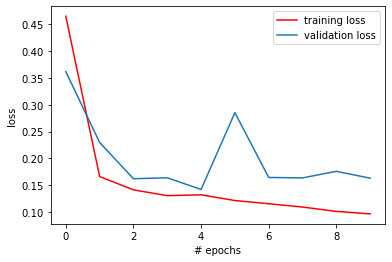

In [20]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

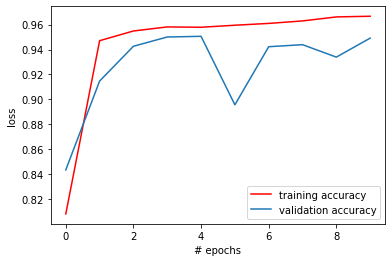

In [18]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
model.save('malaria_model.h5')

In [24]:
loss0, accuracy0 = model.evaluate(validation_data)

173/173 [==============================] - 7s 37ms/step - loss: 0.1633 - accuracy: 0.9492
